**GRIP:THE SPARKS FOUNDATION**





**DATA SCIENCE AND BUSINESS ANALYTICS INTERN**


**AUTHOR:DAVID SANDEEP**

**Task 1:Prediction using Supervised ML**

**In this task we have to predict the percentage score of student based on the no of hours studied. It  has two variables where the feature is the no of hours studied and the target value is percentage score . This can be solved using Simple linear regression**


In [17]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline


In [18]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

 Understanding the Data 


In [19]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [20]:
data.shape

(25, 2)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [22]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Visualising Data 

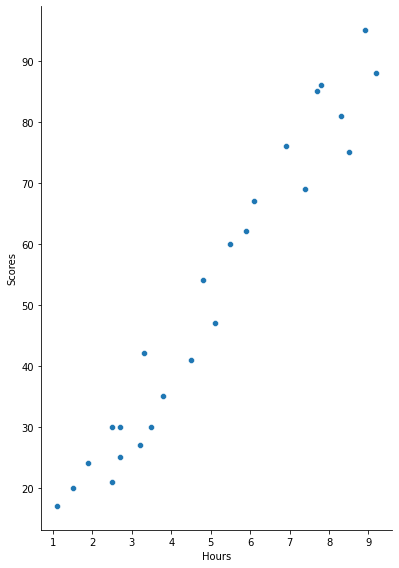

In [23]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['Hours'], y_vars='Scores',height=8, aspect=0.7, kind='scatter')

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**


Simple Linear Regression

In [24]:
#Getting Independent variable and target variable
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [25]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [26]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


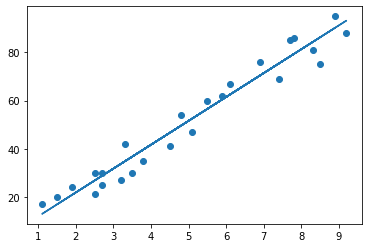

In [27]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [28]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [29]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


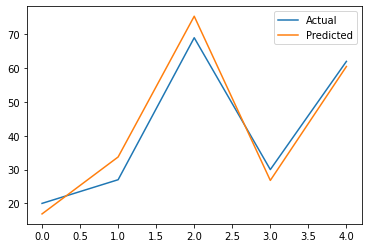

In [30]:
# Actual vs Predicted
df.plot()                     

In [31]:
# Test our model by predicting for 9.25 hours
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


In [32]:
#evaluating our model
from sklearn import metrics
predictions=y_pred
print ('MAE',metrics.mean_absolute_error(y_test,predictions))
print ('MSE',metrics.mean_squared_error(y_test,predictions))
print ('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print ('R^2',metrics.r2_score(y_test,predictions))

MAE 4.183859899002982
MSE 21.598769307217456
RMSE 4.647447612100373
R^2 0.9454906892105354
